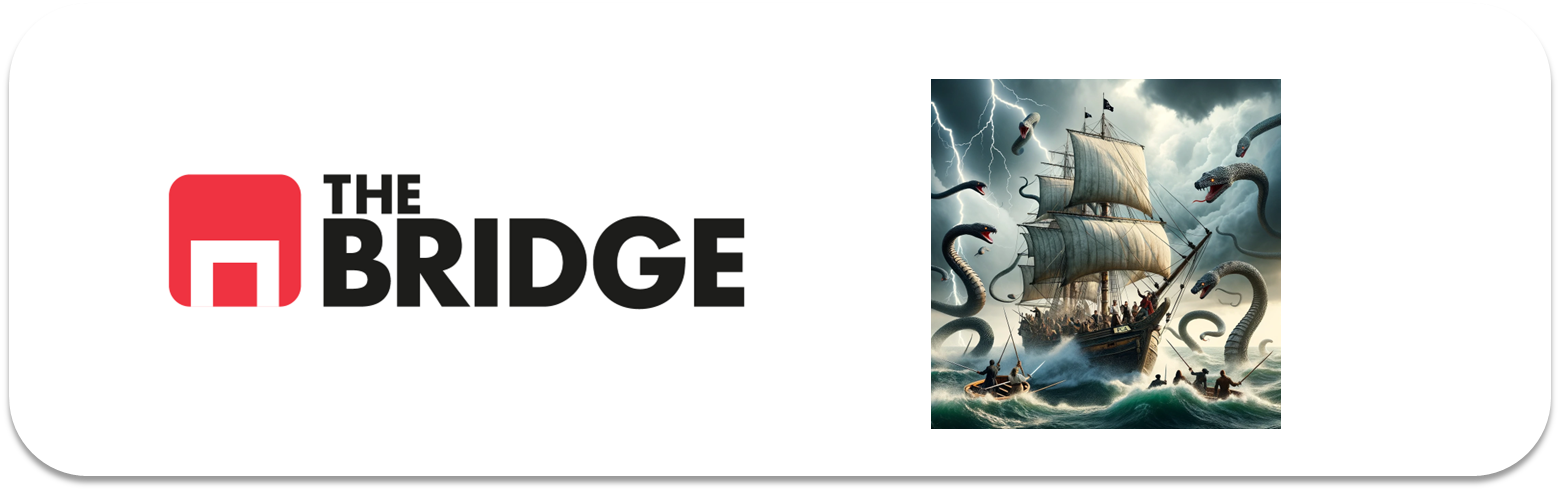

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import bootcampviztools as bv
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



In [2]:
df = pd.read_csv("credit_npo.csv")

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [3]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

### Punto 1

In [6]:
df.isnull().sum()

SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                           721
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                      177
dtype: int64

In [8]:
df = df.dropna().reset_index(drop=True)

In [9]:
df.shape

(11816, 11)

In [10]:
number_cols = [col for col in df.columns if col.startswith("NumberOf")]

for col in number_cols:
    print(f"{col}: {df[col].nunique()} valores únicos")

NumberOfTime30-59DaysPastDueNotWorse: 10 valores únicos
NumberOfOpenCreditLinesAndLoans: 43 valores únicos
NumberOfTimes90DaysLate: 13 valores únicos
NumberOfTime60-89DaysPastDueNotWorse: 8 valores únicos
NumberOfDependents: 10 valores únicos


In [11]:
# Convierto a categóricas aquellas con pocos niveles
cols_to_convert = ['NumberOfDependents']

for col in cols_to_convert:
    df[col] = df[col].astype("category")


### Punto 2.1

In [12]:
# Selecciono solo las columnas numéricas (excluyendo el target y categóricas)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['SeriousDlqin2yrs']).columns

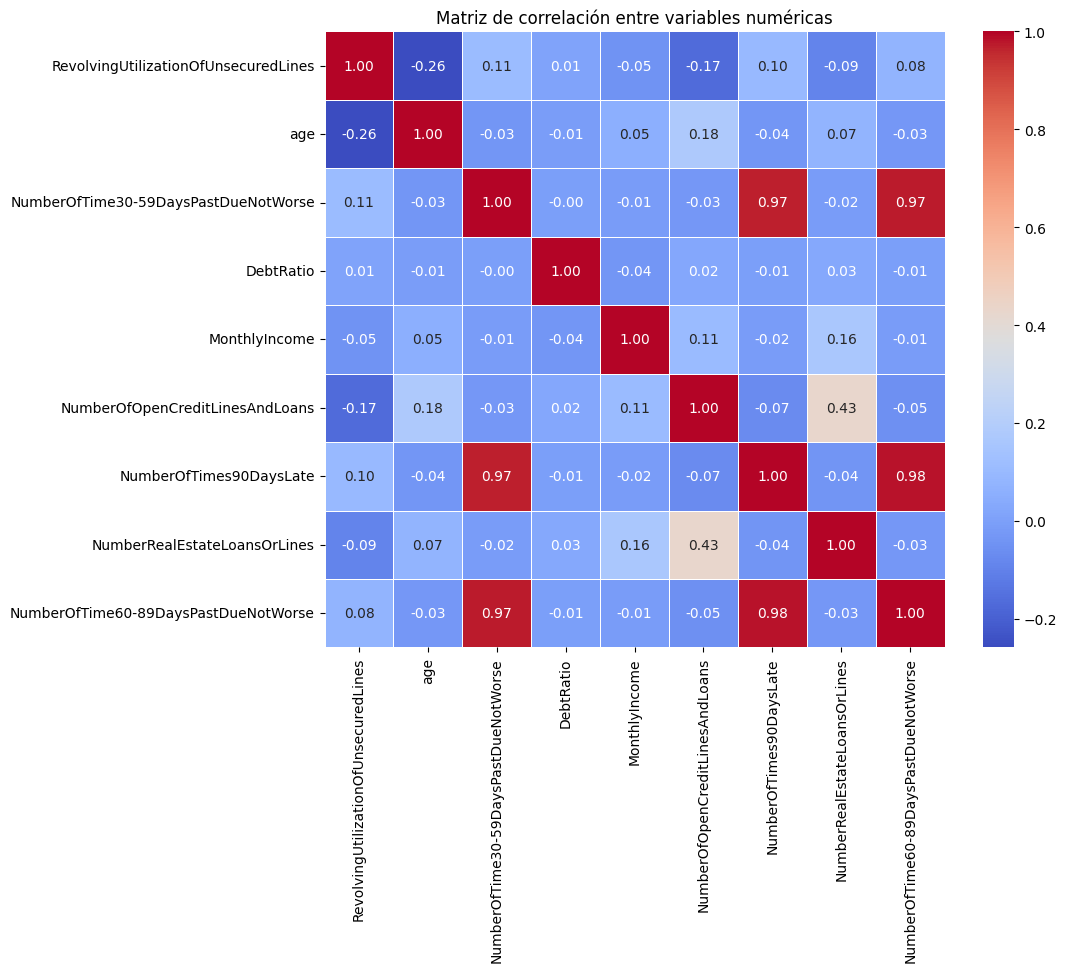

In [13]:
# Hago la matriz de correlación
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


In [14]:
# Establezco el umbral de correlación alta para detectar variables muy similares entre sí:
umbral = 0.9
correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > umbral:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            correlated_features.add(colname_i)
            print(f"{colname_i} vs {colname_j} = {corr_matrix.iloc[i, j]:.2f}")


NumberOfTimes90DaysLate vs NumberOfTime30-59DaysPastDueNotWorse = 0.97
NumberOfTime60-89DaysPastDueNotWorse vs NumberOfTime30-59DaysPastDueNotWorse = 0.97
NumberOfTime60-89DaysPastDueNotWorse vs NumberOfTimes90DaysLate = 0.98


Hay alta multicolinealidad entre estas tres variables relacionadas con pagos atrasados, es decir, hay redundancia.

In [18]:
correlated_features

{'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'}

In [16]:
df = df.drop(columns=correlated_features)

### Punto 2.2

In [19]:
target = 'SeriousDlqin2yrs'

X_num = df.select_dtypes(include=['int64', 'float64']).drop(columns=[target])
X_cat = df.select_dtypes(include=['category'])

y = df[target]

In [20]:
# Genero la ANOVA para variables numéricas
selector_num = SelectKBest(score_func=f_classif, k='all')
selector_num.fit(X_num, y)

# Creo el DataFrame con scores
scores_num = pd.DataFrame({
    'Feature': X_num.columns,
    'F_score': selector_num.scores_
}).sort_values(by='F_score', ascending=False)

scores_num.head()


,Feature,F_score
0,RevolvingUtilizationOfUnsecuredLines,1007.740824
2,NumberOfTime30-59DaysPastDueNotWorse,206.804239
1,age,134.446536
5,NumberOfOpenCreditLinesAndLoans,10.341763
4,MonthlyIncome,5.824786


In [21]:
if not X_cat.empty:
    selector_cat = SelectKBest(score_func=mutual_info_classif, k='all')
    selector_cat.fit(X_cat, y)

    scores_cat = pd.DataFrame({
        'Feature': X_cat.columns,
        'Mutual_info': selector_cat.scores_
    }).sort_values(by='Mutual_info', ascending=False)

    display(scores_cat)
else:
    print("No hay variables categóricas que analiza")


,Feature,Mutual_info
0,NumberOfDependents,0.006402


In [22]:
top_num_features = scores_num['Feature'].head(5).tolist()

if not X_cat.empty:
    top_cat_features = scores_cat['Feature'].head(1).tolist()
else:
    top_cat_features = []

# Unión de todas
selected_features_2_2 = top_num_features + top_cat_features
print("Features seleccionadas (punto 2.2):", selected_features_2_2)


Features seleccionadas (punto 2.2): ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'age', 'NumberOfOpenCreditLinesAndLoans', 'MonthlyIncome', 'NumberOfDependents']


### Punto 2.3

In [24]:
# Hago la unión de numéricas + categóricas
X_full = pd.concat([X_num, pd.get_dummies(X_cat, drop_first=True)], axis=1)

In [25]:
rf_model = RandomForestClassifier(random_state=42)

# SelectFromModel
selector_model = SelectFromModel(rf_model)
selector_model.fit(X_full, y)

# Obtengo features seleccionadas
mask = selector_model.get_support()
selected_features_2_3 = X_full.columns[mask].tolist()

print("Features seleccionadas (punto 2.3):", selected_features_2_3)


Features seleccionadas (punto 2.3): ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans']


### Punto 2.4

In [27]:
X_rfe = X_full.copy()

In [28]:
log_model = LogisticRegression(solver='liblinear', random_state=42)

# Aplico el RFE con 6 features
rfe = RFE(estimator=log_model, n_features_to_select=6)
rfe.fit(X_rfe, y)

# Obtengo las features seleccionadas
selected_features_2_4 = X_rfe.columns[rfe.support_].tolist()

print("Features seleccionadas (punto 2.4 - RFE):", selected_features_2_4)


Features seleccionadas (punto 2.4 - RFE): ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfDependents_1.0', 'NumberOfDependents_2.0', 'NumberOfDependents_3.0', 'NumberOfDependents_5.0', 'NumberOfDependents_6.0']


### Punto 2.5

In [30]:
base_model = LogisticRegression(solver='liblinear', random_state=42)

# Aplico el SFS
sfs = SequentialFeatureSelector(base_model,
                                n_features_to_select=6,
                                direction='forward',
                                cv=StratifiedKFold(5),
                                scoring='accuracy',
                                n_jobs=-1)

sfs.fit(X_full, y)

# Obtengo features seleccionadas
selected_features_2_5 = X_full.columns[sfs.get_support()].tolist()

print("Features seleccionadas (punto 2.5 - SFS):", selected_features_2_5)


Features seleccionadas (punto 2.5 - SFS): ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfDependents_2.0', 'NumberOfDependents_4.0']


### Punto 2.6

In [31]:
# Unifico todo
listas_de_features = [
    selected_features_2_2,
    selected_features_2_3,
    selected_features_2_4,
    selected_features_2_5
]

In [32]:
from collections import Counter

# Aplano las listas
todas_las_features = [feature for sublista in listas_de_features for feature in sublista]

conteo_features = Counter(todas_las_features)

features_votadas = pd.DataFrame(conteo_features.items(), columns=["Feature", "Votos"])
features_votadas = features_votadas.sort_values(by="Votos", ascending=False)

top_features_2_6 = features_votadas["Feature"].head(6).tolist()

print("Features seleccionadas (punto 2.6 - Hard Voting):", top_features_2_6)


Features seleccionadas (punto 2.6 - Hard Voting): ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'age', 'NumberOfOpenCreditLinesAndLoans', 'MonthlyIncome', 'DebtRatio']


### Punto 3

In [45]:
# Añado una función para filtrar features inválidas
def limpiar_features(lista):
    return [f for f in lista if f in X_full.columns]

# Limpio las listas originales
features_2_2 = limpiar_features(selected_features_2_2)
features_2_3 = limpiar_features(selected_features_2_3)
features_2_4 = limpiar_features(selected_features_2_4)
features_2_5 = limpiar_features(selected_features_2_5)
features_2_6 = limpiar_features(top_features_2_6)

# Me quedo solo con las variables válidas
feature_sets = {
    "2.2 - SelectKBest": features_2_2,
    "2.3 - FromModel": features_2_3,
    "2.4 - RFE": features_2_4,
    "2.5 - SFS": features_2_5,
    "2.6 - Voting": features_2_6
}


In [46]:
modelos = {
    "LogisticRegression": LogisticRegression(solver='liblinear', random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

In [47]:
resultados = []

for nombre_modelo, modelo in modelos.items():
    for nombre_set, lista_features in feature_sets.items():
     
        X_subset = X_full[lista_features]
        
        # Validación cruzada
        scores = cross_val_score(modelo, X_subset, y, cv=5, scoring='recall')
        
        resultados.append({
            "Modelo": nombre_modelo,
            "Feature_Set": nombre_set,
            "Recall medio": np.mean(scores),
            "Recall std": np.std(scores)
        })

,Modelo,Feature_Set,Recall medio,Recall std
7,RandomForest,2.4 - RFE,0.148193,0.022085
6,RandomForest,2.3 - FromModel,0.098795,0.014050
5,RandomForest,2.2 - SelectKBest,0.097590,0.013947
9,RandomForest,2.6 - Voting,0.086747,0.015523
11,GradientBoosting,2.3 - FromModel,0.080723,0.014050
14,GradientBoosting,2.6 - Voting,0.080723,0.014050
10,GradientBoosting,2.2 - SelectKBest,0.079518,0.009639
8,RandomForest,2.5 - SFS,0.062651,0.008171
12,GradientBoosting,2.4 - RFE,0.048193,0.019050
13,GradientBoosting,2.5 - SFS,0.033735,0.010503


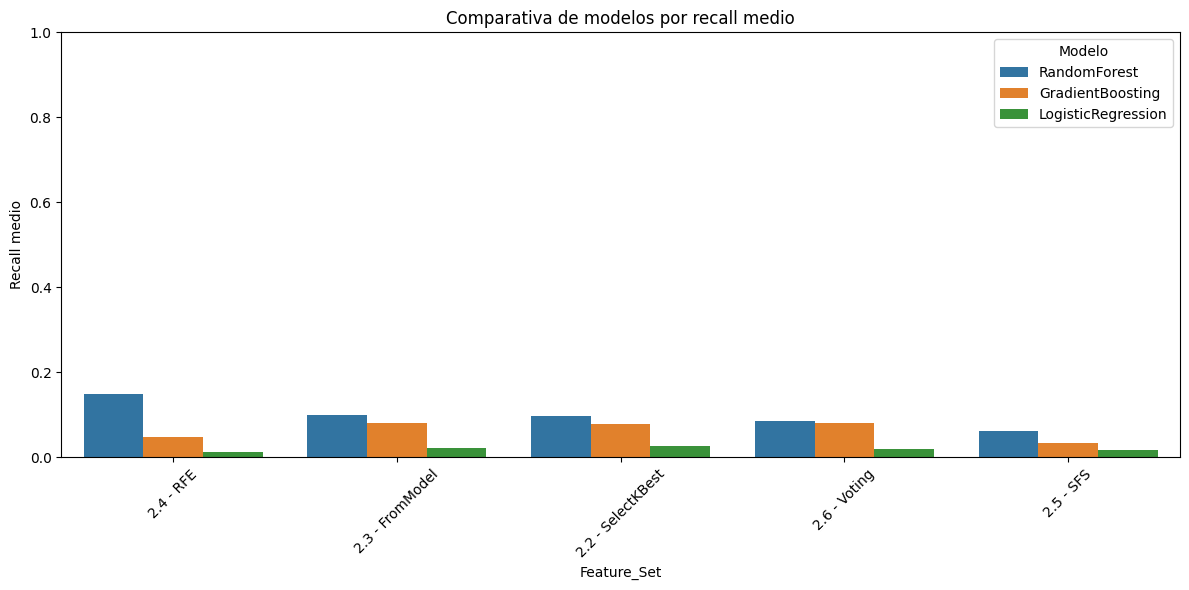

In [48]:
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by="Recall medio", ascending=False)

display(df_resultados)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_resultados, x="Feature_Set", y="Recall medio", hue="Modelo")
plt.title("Comparativa de modelos por recall medio")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

### Punto 4

In [50]:
mejor_modelo = RandomForestClassifier(random_state=42)
mejor_features = features_2_4

In [51]:
X_selected = X_full[mejor_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
# Hago el GridSearchCV
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid = GridSearchCV(estimator=mejor_modelo,
                    param_grid=param_grid,
                    scoring='recall',
                    cv=5,
                    n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

 Mejor combinación de hiperparámetros:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

 Informe de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2198
           1       0.17      0.14      0.15       166

    accuracy                           0.89      2364
   macro avg       0.55      0.54      0.55      2364
weighted avg       0.88      0.89      0.89      2364


 Matriz de confusión:


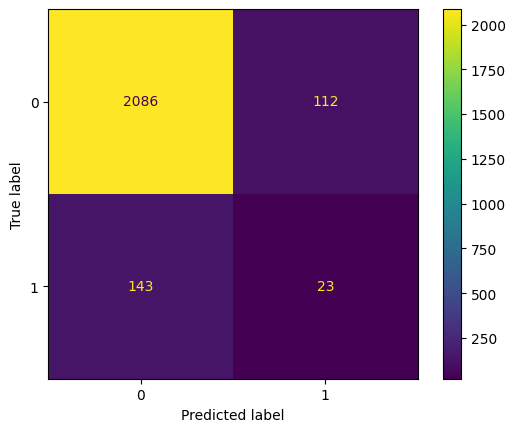

In [57]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print(" Mejor combinación de hiperparámetros:")
print(grid.best_params_)

print("\n Informe de clasificación:")
print(classification_report(y_test, y_pred))

print("\n Matriz de confusión:")
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.